# Preprocessing

To choose the perfect beer we want to analyze the impact of alcohol concentration on popularity of a beer. We want to analyze the following research question: Does the alcohol content lead to a perceiveable change in ratings or review sentiment?

In [1]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In order to perform this analysis we will 

In [3]:
# loading the ratings dataset 

ratings_ba_df = pd.read_csv('data/BeerAdvocate/ratings_BA.csv')
ratings_rb_df = pd.read_csv('data/RateBeer/ratings_RB.csv')

# loading the beers dataset

beers_ba_df = pd.read_csv('data/BeerAdvocate/beers.csv')
beers_rb_df = pd.read_csv('data/RateBeer/beers.csv')

In [7]:
display(ratings_ba_df)

,beer_name,beer_id,brewery_id,brewery_name,style,date,user_id,user_name,appearance,aroma,palate,taste,overall,rating,text
0,Régab,142544,37262,Societe des Brasseries du Gabon (SOBRAGA),Euro Pale Lager,1440064800,nmann08.184925,nmann08,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ..."
1,Barelegs Brew,19590,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,1235127600,stjamesgate.163714,StJamesGate,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...
2,Barelegs Brew,19590,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,1142247600,mdagnew.19527,mdagnew,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim....."
3,Barelegs Brew,19590,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,1101898800,helloloser12345.10867,helloloser12345,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...
4,Barelegs Brew,19590,10093,Strangford Lough Brewing Company Ltd,English Pale Ale,1093860000,cypressbob.3708,cypressbob,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715707,Irvington Pale Ale,19141,885,Summit Station Restaurant & Brewery,American Pale Ale (APA),1100516400,ecoboy.1641,ecoboy,3.50,3.00,3.50,3.00,3.5,3.18,"It may say APA on this site, but talking to th..."
2715708,Kölsch Ale,19139,885,Summit Station Restaurant & Brewery,Kölsch,1141038000,jaluria.31362,jaluria,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...
2715709,Kölsch Ale,19139,885,Summit Station Restaurant & Brewery,Kölsch,1140346800,dithyramb.4413,Dithyramb,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...
2715710,Kölsch Ale,19139,885,Summit Station Restaurant & Brewery,Kölsch,1092132000,manekineko.2654,ManekiNeko,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...


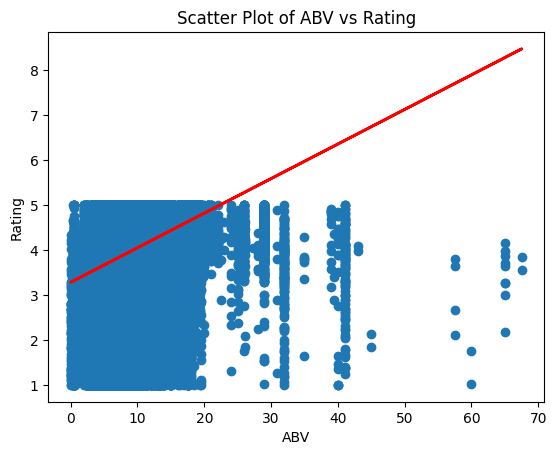

Correlation Coefficient: 0.3005760482059104


In [8]:
# Create a new DataFrame by merging only the required columns based on 'beer_id'
merged_df = ratings_ba_df[['rating', 'beer_id']].merge(beers_ba_df[['beer_id', 'abv']], on='beer_id', how='left')

# Drop rows with NaN values in 'abv'
merged_df = merged_df.dropna(subset=['abv'])

# Create a scatter plot
plt.scatter(merged_df['abv'], merged_df['rating'])
plt.title('Scatter Plot of ABV vs Rating')
plt.xlabel('ABV')
plt.ylabel('Rating')

# Perform linear regression
X = merged_df[['abv']]
y = merged_df['rating']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the regression line
plt.plot(X, slope * X + intercept, color='red', linewidth=2)

# Display the plot
plt.show()

# Output the correlation coefficient
correlation_coefficient = np.corrcoef(merged_df['abv'], merged_df['rating'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


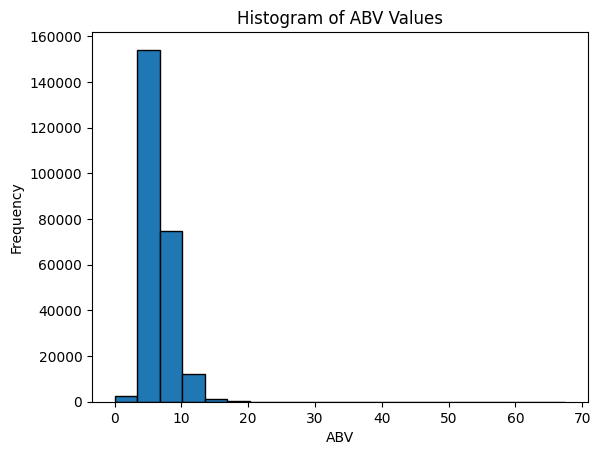

In [9]:

# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a histogram
plt.hist(abv_values, bins=20, edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of ABV Values')
plt.xlabel('ABV')
plt.ylabel('Frequency')

# Display the plot
plt.show()

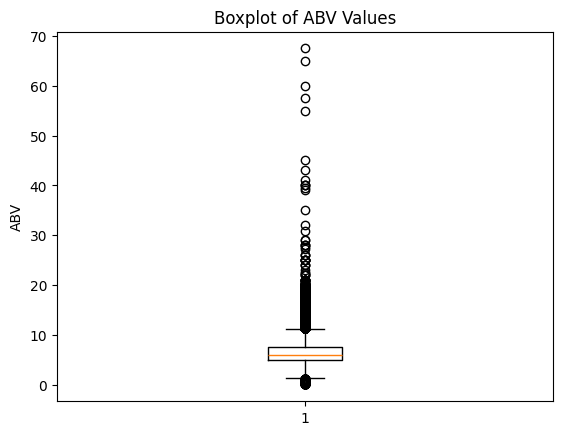

0         4.7
1         3.8
2         4.8
3         4.0
4         4.5
         ... 
280816    5.6
280817    6.8
280818    5.0
280819    5.3
280821    7.0
Name: abv, Length: 244799, dtype: float64

In [13]:
# Drop NaN values in 'abv' column
abv_values = beers_ba_df['abv'].dropna()

# Create a boxplot
plt.boxplot(abv_values)
plt.title('Boxplot of ABV Values')
plt.ylabel('ABV')

# Display the plot
plt.show()
display(beers_ba_df['abv'].dropna())

we need to look at abv score 